# Penjelasan tentang Pentingnya **Single Real Number Evaluation Metric** dalam Machine Learning

Baik Anda sedang melakukan tuning **hyperparameters**, mencoba ide-ide baru untuk **learning algorithms**, atau mencoba berbagai opsi dalam membangun **sistem machine learning** Anda, progres Anda akan jauh lebih cepat jika memiliki **single real number evaluation metric**. Dengan metrik ini, Anda dapat segera mengetahui apakah percobaan terbaru yang Anda lakukan menghasilkan perbaikan atau justru lebih buruk dibandingkan ide sebelumnya. Oleh karena itu, ketika tim baru memulai proyek **machine learning**, saya sering merekomendasikan agar mereka menetapkan **single real number evaluation metric** untuk permasalahan mereka.

Anda mungkin sudah pernah mendengar bahwa **applied machine learning** adalah proses yang sangat **empiris**. Biasanya, kita memiliki ide, menuliskannya dalam kode, menjalankan eksperimen, dan kemudian menggunakan hasilnya untuk menyempurnakan ide kita. Kita terus mengulangi siklus ini untuk meningkatkan algoritma. Sebagai contoh, jika Anda sedang membuat **cat classifier**, dan Anda sudah memiliki classifier **A**, kemudian melatih classifier **B** dengan perubahan **hyperparameters** atau set pelatihan yang berbeda.

Salah satu cara mengevaluasi performa classifier adalah dengan melihat **precision** dan **recall**. Definisi rinci dari **precision** dan **recall** mungkin tidak begitu penting dalam contoh ini, namun singkatnya:
- **Precision**: dari contoh-contoh yang dikenali classifier Anda sebagai kucing, berapa persen yang benar-benar adalah kucing?
- **Recall**: dari semua gambar yang benar-benar adalah kucing, berapa persen yang berhasil dikenali oleh classifier Anda?


Misalnya, jika classifier **A** memiliki precision sebesar 95%, ini berarti ketika classifier **A** mengatakan sesuatu adalah kucing, ada 95% kemungkinan itu memang benar kucing. Sedangkan **recall** sebesar 90% berarti dari semua gambar yang benar-benar adalah kucing, classifier **A** berhasil mengenali 90% di antaranya.

Jika Anda mencoba banyak ide atau **hyperparameters** berbeda, memiliki dua metrik, precision dan recall, untuk memilih classifier yang terbaik bisa mempersulit pengambilan keputusan dengan cepat. **Machine learning literature** sering menggabungkan precision dan recall menggunakan **F1 Score**. Rumus dari **F1 Score** adalah:  
$$
F1 = \frac{2}{\frac{1}{P} + \frac{1}{R}}
$$
Di mana F1 merupakan **harmonic mean** antara precision (P) dan recall (R). Metrik ini membantu menyeimbangkan precision dan recall. Dalam contoh ini, kita bisa melihat bahwa classifier **A** memiliki F1 score yang lebih baik, sehingga kita dapat memilih classifier **A**.

Banyak tim machine learning yang memiliki **dev set** dan **single number evaluation metric** dapat mempercepat proses iterasi dalam menyempurnakan algoritma mereka. Memiliki metrik yang jelas membantu Anda dan tim mengidentifikasi apakah classifier A atau B lebih baik.


Sebagai contoh lain, jika Anda membangun **cat app** untuk pecinta kucing di empat wilayah besar, seperti AS, Tiongkok, India, dan seluruh dunia, Anda mungkin ingin melacak performa di tiap wilayah. Namun, melacak empat angka dapat mempersulit pengambilan keputusan cepat. Dalam hal ini, Anda bisa menggunakan **average performance** sebagai single real number evaluation metric untuk melihat secara keseluruhan apakah classifier yang diuji memenuhi kriteria.


Jadi, dalam machine learning, sering kali Anda memiliki ide, mengimplementasikannya, lalu menguji apakah ide tersebut memberikan hasil yang diinginkan. Dengan **single real number evaluation metric**, Anda bisa mempercepat proses iterasi dan meningkatkan efisiensi. Di video berikutnya, kita akan membahas tentang pengaturan metrik evaluasi yang lebih efektif, yaitu **optimizing metrics** dan **satisfying metrics**.



# Menggabungkan Beberapa Metrik Evaluasi

Tidak selalu mudah untuk menggabungkan semua hal yang Anda pedulikan menjadi satu metrik evaluasi berbasis angka. Dalam kasus seperti ini, terkadang berguna untuk mengatur **satisficing** dan **optimizing metrics**. Mari saya tunjukkan maksudnya.

Misalnya, Anda peduli dengan **classification accuracy** dari klasifikator kucing Anda. Ini bisa berupa **F1 score** atau ukuran akurasi lainnya. Namun, selain akurasi, Anda juga memperhatikan **running time** atau waktu yang dibutuhkan untuk mengklasifikasi satu gambar. Misalnya, **classifier A** membutuhkan 80 milidetik, **B** 95 milidetik, dan **C** 1.500 milidetik (1,5 detik) untuk mengklasifikasi sebuah gambar.

Satu pendekatan yang dapat Anda lakukan adalah menggabungkan **accuracy** dan **running time** menjadi satu metrik evaluasi keseluruhan, misalnya dengan formula berikut:

total_cost = accuracy - 0.5 * running_time

Namun, mungkin terasa agak tidak alami untuk menggabungkan **accuracy** dan **running time** menggunakan formula linear seperti ini. Maka, alternatif lain yang bisa dilakukan adalah memilih klasifikator yang **memaksimalkan accuracy**, dengan syarat bahwa **running time** harus kurang dari atau sama dengan 100 milidetik.

Dalam kasus ini:
- **Accuracy** adalah metrik **optimizing** karena Anda ingin memaksimalkannya.
- **Running time** adalah metrik **satisficing**, yang berarti bahwa selama di bawah 100 milidetik, Anda tidak terlalu peduli apakah itu 100 milidetik atau lebih cepat.

Dengan mengatur **optimizing** dan **satisficing metrics** seperti ini, Anda dapat memilih klasifikator terbaik, yaitu **classifier B** karena memiliki **running time** di bawah 100 milidetik dan **accuracy** terbaik.

## Contoh Umum

Jika Anda memiliki N metrik yang Anda pedulikan, terkadang masuk akal untuk memilih salah satunya sebagai **optimizing metric** dan N-1 lainnya sebagai **satisficing metrics**. Contohnya:
- Anda ingin waktu berjalan lebih cepat dari 100 milidetik, tetapi tidak peduli apakah lebih cepat dari itu.

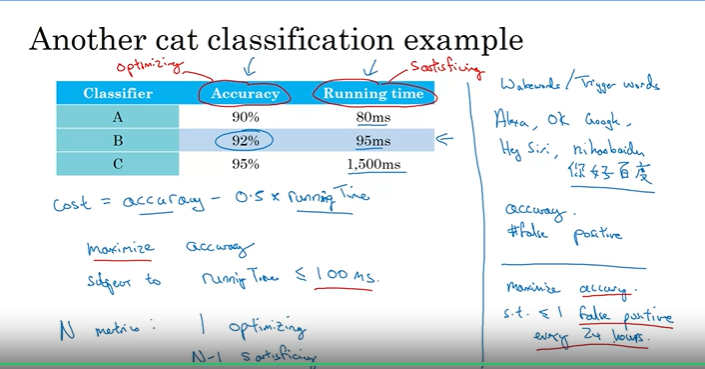

## Contoh Lainnya

Misalnya, Anda membangun sistem untuk mendeteksi **wake words** seperti perangkat suara Amazon Echo dengan perintah “Alexa” atau Google dengan “OK Google”. Anda peduli pada:
- **Accuracy**: Ketika seseorang mengucapkan trigger word, perangkat harus menyala.
- **False Positives**: Ketika tidak ada trigger word yang diucapkan, perangkat seharusnya tidak menyala secara acak.

Pada kasus ini, Anda dapat mengatur:
- **Accuracy** sebagai metrik **optimizing** untuk memaksimalkan kemungkinan perangkat menyala saat trigger word diucapkan.
- **False Positives** sebagai metrik **satisficing** dengan maksimum satu false positive setiap 24 jam.

## Kesimpulan

Jika ada beberapa hal yang Anda pedulikan, pilih satu sebagai **optimizing metric** dan satu atau lebih sebagai **satisficing metrics**. Evaluasi ini biasanya dilakukan pada **training set**, **dev set**, atau **test set**. Di video berikutnya, kita akan membahas pedoman dalam mengatur **training**, **dev**, dan **test set**.

# Pengaturan Dev Set dan Test Set dalam Machine Learning

Cara kamu mengatur **training dev** atau **development set** serta **test set** dapat berdampak besar pada seberapa cepat kamu atau tim kamu membuat kemajuan dalam membangun **aplikasi machine learning**. Banyak tim, bahkan tim di perusahaan besar, mengatur **data set** dengan cara yang justru memperlambat kemajuan daripada mempercepatnya. Mari kita lihat bagaimana kamu dapat mengatur **data set** ini untuk memaksimalkan efisiensi tim.

## Fokus pada Pengaturan Dev Set dan Test Set

Dalam video ini, saya ingin fokus pada cara kamu mengatur **dev set** dan **test set**. **Dev set**, atau juga disebut **development set**, kadang disebut **hold out cross validation set**. Dalam **workflow machine learning**, kamu mencoba banyak ide, melatih berbagai model pada **training set**, dan kemudian menggunakan **dev set** untuk mengevaluasi ide-ide yang berbeda dan memilih yang terbaik. Kamu akan terus berinovasi untuk meningkatkan performa **dev set** sampai akhirnya kamu mendapatkan satu model yang memuaskan, yang kemudian dievaluasi pada **test set**.

### Contoh Kasus

Misalkan kamu sedang membangun **cat classifier**, dan beroperasi di wilayah-wilayah berikut: U.S, U.K, negara-negara Eropa lainnya, Amerika Selatan, India, China, negara-negara Asia lainnya, dan Australia. Bagaimana kamu mengatur **dev set** dan **test set**?

Salah satu caranya adalah memilih empat dari wilayah-wilayah ini untuk dimasukkan dalam **dev set**, dan empat wilayah lainnya untuk **test set**. Namun, ini adalah ide yang buruk karena dalam contoh ini, **dev set** dan **test set** berasal dari **distribusi yang berbeda**. Saya sarankan agar kamu mengatur **dev set** dan **test set** dari **distribusi yang sama**. 

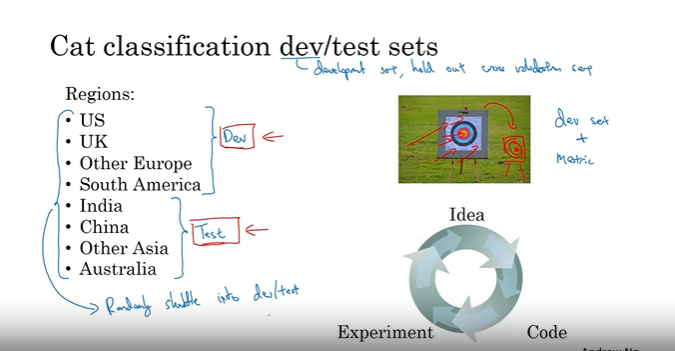

Dengan **dev set** dan **test set** dari distribusi yang sama, tim dapat berinovasi dengan cepat, mencoba ide-ide berbeda, dan mengevaluasi model pada **dev set** untuk memilih yang terbaik. Tantangannya adalah jika **dev set** dan **test set** kamu dari distribusi berbeda, maka hasil yang baik di **dev set** tidak menjamin hasil yang sama di **test set**. 

### Contoh Lainnya: Loan Approval

Ada tim **machine learning** yang menghabiskan waktu berbulan-bulan untuk mengoptimalkan model pada **dev set** yang terdiri dari data persetujuan pinjaman di wilayah berpendapatan menengah. Namun, saat menguji model ini pada wilayah berpendapatan rendah, performanya tidak memadai. Pengaturan **dev set** yang tidak sesuai dengan **test set** membuat tim ini harus mengulang banyak pekerjaan, menghabiskan waktu dan sumber daya.

## Rekomendasi dalam Pengaturan Dev Set dan Test Set

Agar pengaturan **dev set** dan **test set** efektif, pastikan data dalam keduanya merefleksikan data yang diharapkan di masa depan. **Dev set** dan **test set** sebaiknya berasal dari **distribusi yang sama**, sehingga target yang ingin dicapai lebih jelas dan tim bisa bekerja dengan lebih efisien.

## Kesimpulan

Menetapkan **dev set** dan **metric** evaluasi adalah cara untuk menentukan target yang ingin kamu capai. Dengan mengatur **dev set** dan **test set** dari distribusi yang sama, kamu benar-benar mengarahkan tim ke target yang kamu harapkan akan dicapai. Pada video selanjutnya, kita akan membahas lebih lanjut tentang ukuran dari **dev set** dan **test set** serta pengaruhnya dalam era **deep learning**.

> **Catatan Penting:** Mengikuti pedoman ini dapat menghemat waktu dan tenaga tim **machine learning**. Semoga panduan ini bermanfaat untuk kamu juga.



## Pembagian Dev dan Test Set di Era Deep Learning

Dalam video terakhir, Anda melihat bahwa **dev** dan **test set** harus berasal dari distribusi yang sama, tetapi berapa lama durasinya? Panduan untuk menyusun dev dan test set terus berubah di era **Deep Learning**. Mari kita lihat beberapa praktik terbaik.

### Pembagian Data Tradisional

Anda mungkin pernah mendengar aturan umum dalam **machine learning** untuk membagi semua data yang dimiliki dengan rasio 70/30 menjadi **train** dan **test set**, atau jika menggunakan **train dev** dan **test set**, maka 60% untuk train, 20% untuk dev, dan 20% untuk test. Di era awal machine learning, aturan ini cukup masuk akal, terutama ketika ukuran dataset masih kecil. 

Sebagai contoh:
- Jika memiliki 100 data, aturan 70/30 atau 60/20/20 ini cukup relevan.
- Jika memiliki 1.000 atau bahkan 10.000 data, aturan ini masih dapat diterapkan.

Namun, di era machine learning modern, kita sudah terbiasa bekerja dengan dataset yang jauh lebih besar.

### Pembagian Data di Era Deep Learning

Misalkan Anda memiliki **satu juta contoh data** untuk pelatihan, cukup masuk akal jika Anda menggunakan 98% data untuk **training set**, dan 1% untuk **dev** serta 1% untuk **test set**. Saya akan menyebut **DNT** sebagai singkatan untuk dev dan test set. Karena jika Anda memiliki satu juta contoh, maka 1% dari itu adalah 10.000 contoh, yang mungkin sudah cukup untuk dev set atau test set.

Di era **Deep Learning** di mana dataset seringkali sangat besar, cukup masuk akal untuk menggunakan lebih sedikit dari 20 atau 30% data untuk dev atau test set. Algoritma Deep Learning memiliki kebutuhan besar akan data, sehingga umumnya sebagian besar data dialokasikan untuk training.

### Ukuran Test Set yang Cukup Besar

Ingat, tujuan test set adalah untuk mengevaluasi seberapa baik sistem akhir Anda. Panduan yang direkomendasikan adalah mengatur test set cukup besar untuk memberikan **kepercayaan tinggi** terhadap performa sistem secara keseluruhan. Jika Anda merasa bahwa 10.000 contoh cukup untuk mengukur performa sistem, maka itu mungkin sudah cukup—dan ini bisa jauh lebih sedikit dari 30% dari keseluruhan dataset, tergantung pada jumlah data yang dimiliki.

### Apakah Wajib Memiliki Test Set?

Pada beberapa aplikasi, Anda mungkin tidak membutuhkan test set. Dalam beberapa kasus, orang hanya membagi **train** dan **dev set** tanpa test set. Jika Anda terus menyetel **dev set**, lebih baik menyebutnya sebagai dev set. Hal ini lebih sehat dan realistis daripada berpura-pura memiliki test set.

Namun, memiliki test set terpisah untuk mendapatkan **estimasi tidak bias** sangat direkomendasikan sebelum sistem Anda dirilis. Meskipun memiliki dev set yang besar bisa membantu menghindari **overfitting**, tetap lebih baik memiliki test set yang terpisah.

### Kesimpulan

Di era **big data**, aturan lama 70/30 sudah tidak berlaku lagi. Tren terbaru adalah menggunakan lebih banyak data untuk **training** dan lebih sedikit untuk dev dan test, terutama pada dataset besar. Ukuran dev set sebaiknya cukup besar untuk membantu mengevaluasi ide-ide berbeda, sementara test set digunakan untuk menilai performa akhir.

---

Semoga panduan ini memberikan sedikit gambaran tentang cara menyusun dev dan test set di era Deep Learning. Selanjutnya, kita akan membahas kapan perlu mengganti **evaluation metric** atau dev dan test set.

---

> **Catatan**: Kadang-kadang, dalam suatu masalah machine learning, Anda mungkin perlu mengubah **evaluation metric** atau dev dan test set di tengah proses pengembangan.

# Mengapa Penting untuk Memperbarui _Dev Set_ dan _Evaluation Metric_

Kamu sudah melihat bagaimana memiliki _dev set_ dan _evaluation metric_ itu seperti menempatkan target untuk diincar timmu. Namun, terkadang dalam perjalanan proyek, kamu mungkin menyadari bahwa targetmu salah tempat. Dalam situasi ini, kamu perlu memindahkan target. Berikut adalah contohnya.

Misalnya kamu membangun _cat classifier_ untuk menemukan banyak gambar kucing untuk pengguna yang mencintai kucing, dan _metric_ yang kamu pilih adalah _classification error_. Algoritma A dan B masing-masing memiliki 3% dan 5% _error_, jadi tampaknya Algoritma A lebih baik. Namun, saat dicoba, Algoritma A justru membiarkan banyak gambar pornografi lewat, yang jelas tidak dapat diterima untuk perusahaan maupun pengguna.

Sebaliknya, Algoritma B memiliki _error_ 5%, yang berarti kurang banyak gambar kucing yang lolos, tetapi tidak ada gambar pornografi. Jadi, dari sudut pandang perusahaan dan pengguna, Algoritma B sebenarnya lebih baik karena tidak membiarkan gambar pornografi lolos. Dalam kasus ini, _evaluation metric_ serta _dev set_ lebih memilih Algoritma A karena _error_ lebih rendah, tetapi Algoritma B lebih baik untuk preferensi pengguna.

## Mengubah _Evaluation Metric_ atau _Dev Set_

Ketika _evaluation metric_ tidak lagi memberikan urutan preferensi yang benar antara algoritma, saatnya mengganti _evaluation metric_ atau bahkan _dev set_ atau _test set_. Misalnya, _misclassification error metric_ yang kamu gunakan dapat ditulis sebagai berikut:

$$
\text{Error} = \frac{1}{m} \sum_{i=1}^{m} \mathbf{1}(y_i \neq \hat{y}_i)
$$

Di sini, semua kesalahan dihitung sama, termasuk gambar pornografi. Namun, kamu mungkin ingin memberikan bobot lebih besar pada kesalahan yang melibatkan gambar pornografi. Misalnya, menambahkan bobot _w(i)_ di mana:

- $ w(i) = 1 $ untuk gambar non-pornografi
- $ w(i) = 10 $ atau lebih besar untuk gambar pornografi

Dengan cara ini, kesalahan pada gambar pornografi lebih dihitung, misalnya, 10 kali lebih besar.

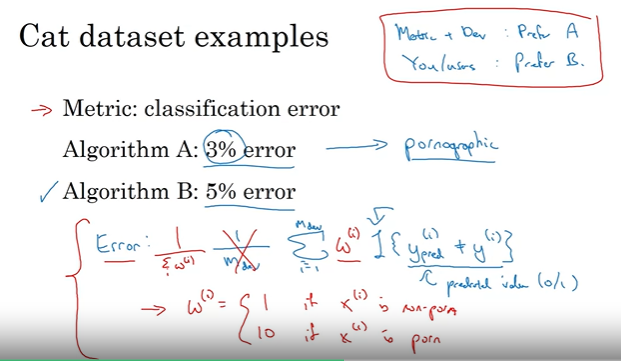

### Mengubah _Dev Set_ Agar Lebih Relevan

Misalkan _cat classifier_ kamu diuji menggunakan gambar berkualitas tinggi dari internet, tetapi saat digunakan di aplikasi, gambar dari pengguna lebih beragam (buram, ekspresi lucu, framing buruk). Algoritma B bisa saja lebih baik di sini, meskipun memiliki _error_ lebih tinggi di _dev set_. Jika _dev set_ tidak mencerminkan aplikasi yang sesungguhnya, saatnya memperbarui _dev set_ agar lebih sesuai dengan data sebenarnya.

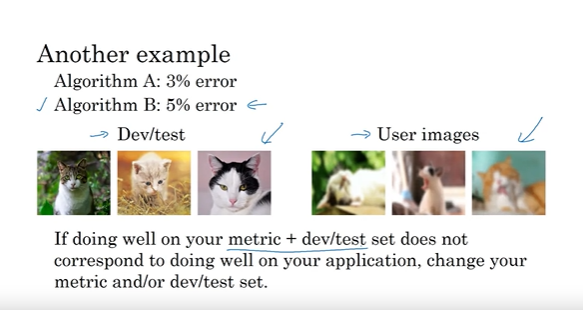

## Mempercepat Proses Iterasi Tim

Mempunyai _evaluation metric_ dan _dev set_ yang terdefinisi dengan baik memungkinkan tim untuk lebih cepat dalam menentukan apakah Algoritma A atau B yang lebih baik. Rekomendasi saya adalah segera buat _metric_ dan _dev set_, walaupun tidak sempurna, untuk mempercepat iterasi. Jika nantinya diperlukan, ubah saat sudah punya pemahaman yang lebih baik.

Terakhir, jika _evaluation metric_ dan data yang kamu evaluasi tidak sesuai dengan tujuan aplikasimu, maka ubahlah _metric_ dan/atau _dev set_ untuk lebih sesuai dengan kinerja yang kamu harapkan. Semoga panduan ini membantu timmu dalam menetapkan target dengan baik agar bisa terus meningkatkan performa dengan efisien.